# Machine Learning Midterm, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.

Note that you have **2.5 hours** to do the exam. Also note that there is at least one short answer question that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (20 points)

Suppose you enjoy running for exercise, have great data science skills, and would like to build tools to help runners train effectively. You would like to predict a runner's future performance based on his or her past performances, and perhaps come up with some analytics about his or her fitness (increasing, decreasing, etc.)

Consider the training and testing data given in the cell below. The data are measurements of Matt's runs from mid June to mid September 2019. The $\mathtt{X}$ data contain variables for pace, distance, average temperature, and the number of hours of rest since the last run. The $\mathbf{y}$ data are the average heart rate in beats per minute over each run. These data come from Garmin and OpenWeatherMap.


In [137]:
import numpy as np

# Columns:
# 0: average pace in minutes per kilometer
# 1: distance in meters
# 2: avg apparent temperature (Farenheight, includes humidity factor etc.)
# 3: number of hours of rest since the last run

Xtrain = np.array(
      [[5.6041250e+00, 1.0386240e+04, 9.6480003e+01, 1.6693195e+02],
       [4.5901036e+00, 3.3501699e+03, 9.0070000e+01, 1.4042222e+01],
       [5.5853438e+00, 1.0589420e+04, 9.6894997e+01, 4.9480556e+01],
       [8.4602365e+00, 5.2353198e+03, 9.2915001e+01, 4.8527222e+01],
       [5.2759314e+00, 1.0260830e+04, 8.0415001e+01, 6.9376945e+01],
       [5.0050054e+00, 1.0308060e+04, 7.8995003e+01, 7.2154442e+01],
       [5.1679587e+00, 1.0297140e+04, 8.4269997e+01, 2.4243610e+01],
       [5.5909653e+00, 1.6628650e+04, 9.5754997e+01, 5.8910278e+01],
       [5.3112388e+00, 1.0397030e+04, 9.1875000e+01, 1.2679722e+01],
       [5.0704794e+00, 1.0266610e+04, 8.7489998e+01, 4.8466110e+01],
       [5.1297836e+00, 8.6998496e+03, 8.6510002e+01, 4.7598888e+01],
       [5.8092251e+00, 2.1145150e+04, 9.6199997e+01, 5.9379166e+01],
       [5.1203279e+00, 1.0201160e+04, 9.2875000e+01, 8.4886391e+01],
       [5.1424460e+00, 1.0161310e+04, 8.9500000e+01, 2.3730000e+01],
       [5.9502554e+00, 2.4152381e+04, 8.7389999e+01, 5.9973331e+01],
       [5.4752522e+00, 1.2884080e+04, 9.2269997e+01, 3.6443890e+01],
       [6.2727389e+00, 6.8037402e+03, 9.0209999e+01, 2.3653889e+01],
       [5.6941118e+00, 1.6106010e+04, 8.7489998e+01, 2.4058611e+01],
       [5.6941118e+00, 8.0607300e+03, 9.0735001e+01, 5.0604721e+01],
       [5.1313629e+00, 1.4493960e+04, 9.4910004e+01, 2.3852777e+01],
       [5.8397570e+00, 6.4594302e+03, 9.5209999e+01, 1.5108278e+02],
       [6.0342746e+00, 2.1100061e+04, 9.2345001e+01, 1.9518888e+01],
       [5.7790108e+00, 1.4495710e+04, 8.3410004e+01, 6.7106941e+01],
       [5.4059896e+00, 1.6109050e+04, 8.6989998e+01, 2.4075834e+01],
       [8.1819668e+00, 6.5416201e+03, 8.1650002e+01, 2.3606112e+01],
       [5.6230321e+00, 8.0613101e+03, 9.4324997e+01, 2.5450277e+01],
       [5.9101658e+00, 2.4156170e+04, 9.1650002e+01, 3.4091110e+01],
       [5.1313629e+00, 1.4496380e+04, 8.9084999e+01, 3.6194443e+01],
       [5.6650805e+00, 8.0576001e+03, 8.5985001e+01, 2.3728056e+01],
       [5.7991180e+00, 1.6350690e+04, 8.9775002e+01, 4.7979168e+01],
       [5.8234339e+00, 8.0631299e+03, 9.4845001e+01, 2.6273333e+01],
       [5.7254095e+00, 2.5760990e+04, 9.6279999e+01, 3.4454166e+01],
       [5.4324207e+00, 1.2948430e+04, 9.0654999e+01, 3.6110554e+01],
       [5.7097182e+00, 8.0617100e+03, 8.5294998e+01, 2.3565277e+01],
       [5.6727929e+00, 1.2387530e+04, 9.2535004e+01, 2.4852501e+01],
       [5.4024849e+00, 8.1778799e+03, 8.8980003e+01, 4.7656387e+01],
       [5.5242515e+00, 1.9322131e+04, 7.9985001e+01, 4.6826668e+01],
       [5.1234756e+00, 1.6099910e+04, 8.3794998e+01, 2.4853611e+01],
       [5.8418040e+00, 6.7139800e+03, 8.3955002e+01, 2.4078611e+01],
       [5.5151114e+00, 1.7712240e+04, 8.5815002e+01, 2.3572500e+01]])

Xtrain.shape

(40, 4)

In [138]:
# Outcome: average heart rate, in beats per minute

ytrain = np.array([[150., 146., 148., 152., 147., 152., 151., 144., 149., 146., 144.,
       141., 151., 150., 140., 147., 133., 144., 129., 154., 146., 141.,
       155., 151., 111., 138., 141., 151., 134., 150., 134., 150., 149.,
       134., 140., 137., 141., 150., 129., 143.]])
ytrain = ytrain.T
ytrain.shape

(40, 1)

In [139]:
Xtest = np.array([[5.6516337e+00, 1.1277530e+04, 9.4644997e+01, 5.3126389e+01],
       [5.9737158e+00, 2.8977260e+04, 9.4230003e+01, 2.0872499e+01],
       [5.4094992e+00, 1.1285160e+04, 7.9794998e+01, 4.6364723e+01],
       [5.3885121e+00, 1.9334391e+04, 8.2080002e+01, 2.2815277e+01],
       [4.9500046e+00, 1.6110120e+04, 8.3410004e+01, 4.8843613e+01],
       [5.9269800e+00, 8.0592202e+03, 9.9250000e+01, 2.7060556e+01],
       [6.0496063e+00, 3.2190711e+04, 9.3800003e+01, 2.4073334e+01],
       [6.6427526e+00, 9.8029502e+03, 8.5150002e+01, 4.4903057e+01],
       [5.4112554e+00, 1.0247100e+04, 8.1955002e+01, 2.4426390e+01],
       [5.5853438e+00, 2.2543590e+04, 8.4849998e+01, 2.3573610e+01],
       [4.0709982e+00, 2.5134600e+03, 9.4324997e+01, 2.7191111e+01],
       [5.9038849e+00, 9.6685303e+03, 8.8099998e+01, 2.3758333e+01],
       [5.5315852e+00, 1.9787490e+04, 9.7684998e+01, 3.3159168e+01],
       [5.1062093e+00, 1.2883740e+04, 7.9375000e+01, 5.9931667e+01],
       [6.1591525e+00, 9.6694502e+03, 8.2260002e+01, 2.4936388e+01],
       [5.4914880e+00, 1.2887790e+04, 9.7154999e+01, 5.1264168e+01]])
Xtest.shape
Xtt = np.c_[np.ones(len(Xtest)), Xtest]
Xtt.shape

(16, 5)

In [140]:
ytest = np.array([[134., 144., 145., 142., 153., 130., 139., 122., 141., 140., 129.,
       129., 142., 143., 122., 141.]])
ytest.shape


# import matplotlib.pyplot as plt

Xtrain[:,1].shape

(40,)

(Q1 continued) **Do the following:**

1. **Build a linear regresion model for the training data. Give the optimal parameter vector $\mathbf{\theta}$ below:**

2. **Plot predicted heart rate against actual heart rate for the training set and the test set using these parameters.**


In [141]:
# Place code to build regression model and draw plots here
# Put your modeling and plotting code here and show the result.

def mean_squared_error(y, y_predicted):
    return np.sum(np.power(y - y_predicted, 2)) / y.shape[0]
def analytical_solution(X_input, y):
    val1 = np.linalg.inv(np.dot(np.transpose(X_input),X_input))
    val2 = np.dot(np.transpose(X_input),y)
    theta = np.dot(val1,val2)
    return theta

Xt = np.c_[np.ones(len(Xtrain)), Xtrain]


analyticalTheta = analytical_solution(Xt, ytrain)
print(analyticalTheta)
analyticalTheta = analyticalTheta.T
analyticalTheta.shape
# Xtrain

[[ 1.47941323e+02]
 [-5.41671644e+00]
 [ 3.19000792e-04]
 [ 2.18578976e-01]
 [ 6.18725326e-02]]


(1, 5)

In [156]:
ytest.shape

(1, 16)

In [144]:
predictY = analyticalTheta[0,0]*Xtt[:,0] + analyticalTheta[0,1]*Xtt[:,1] + analyticalTheta[0,2]*Xtt[:,2] +analyticalTheta[0,3]*Xtt[:,3] + analyticalTheta[0,4]*Xtt[:,4] 

predictY = np.array([predictY])
predictY

mse = mean_squared_error(predictY, ytest)
print("MSE: ", mse)

MSE:  1428.122272278234


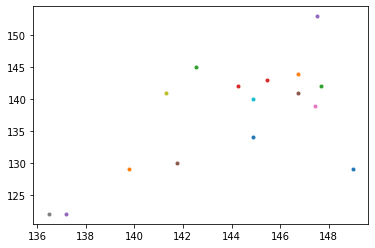

In [145]:
import matplotlib.pyplot as plt

plt.plot(predictY, ytest, '.')
plt.show()

## If the theta values were predicted accurately, it would have formed a straight diagnol line 

## Question 2 (20 points)

As it turns out, there is one outlier in the training data, when Matt's heart rate monitor was not fixed correctly against the skin, resulting in a strange average heart rate.

**Do the following:**

1. **Plot pace (column 0) against heart rate ($\textbf{y}$) for the training data.**

2. **Give the outlier point's data here and explain why it does not seem to be consistent with the other data.**

3. **Build a new regression model without this point, and make a new plot of predicted versus actual heart rate for the training set and test set using the new parameters.**

4. **Briefly discuss whether the result based on the "cleaned" dataset is better than the result on the original data set.**


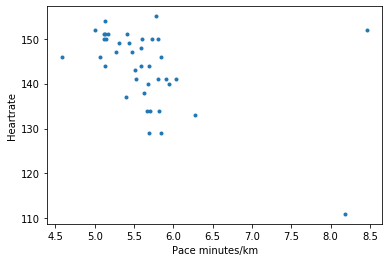

In [148]:
# Place code for plots and the new regression model here
plt.plot(Xtrain[:,0], ytrain, '.')
plt.xlabel('Pace minutes/km')
plt.ylabel('Heartrate')
plt.show()

### Ans2: Outlier data 

It is natural that if the pace of low, that means Prof. Matt is running fast per kilometre, the heartrate will be high. But there's one line which shows that high heartrate for really high pace(means he is moving slow). This is the outlier.



Outlier data is where the pace is almost equal to 8.4 and heartrate is above 150. The top right corner one
So the modified Xtrain will be

In [149]:
for i in range(0,len(Xtrain)):
    if Xtrain[i,0] > 8:
        print(i, " ", ytrain[i])
        # Clearly 4th one is the outlier

3   [152.]
24   [111.]


In [150]:
# removing the 4 index...
modXtrain = np.array(
      [[5.6041250e+00, 1.0386240e+04, 9.6480003e+01, 1.6693195e+02],
       [4.5901036e+00, 3.3501699e+03, 9.0070000e+01, 1.4042222e+01],
       [5.5853438e+00, 1.0589420e+04, 9.6894997e+01, 4.9480556e+01],
       [5.2759314e+00, 1.0260830e+04, 8.0415001e+01, 6.9376945e+01],
       [5.0050054e+00, 1.0308060e+04, 7.8995003e+01, 7.2154442e+01],
       [5.1679587e+00, 1.0297140e+04, 8.4269997e+01, 2.4243610e+01],
       [5.5909653e+00, 1.6628650e+04, 9.5754997e+01, 5.8910278e+01],
       [5.3112388e+00, 1.0397030e+04, 9.1875000e+01, 1.2679722e+01],
       [5.0704794e+00, 1.0266610e+04, 8.7489998e+01, 4.8466110e+01],
       [5.1297836e+00, 8.6998496e+03, 8.6510002e+01, 4.7598888e+01],
       [5.8092251e+00, 2.1145150e+04, 9.6199997e+01, 5.9379166e+01],
       [5.1203279e+00, 1.0201160e+04, 9.2875000e+01, 8.4886391e+01],
       [5.1424460e+00, 1.0161310e+04, 8.9500000e+01, 2.3730000e+01],
       [5.9502554e+00, 2.4152381e+04, 8.7389999e+01, 5.9973331e+01],
       [5.4752522e+00, 1.2884080e+04, 9.2269997e+01, 3.6443890e+01],
       [6.2727389e+00, 6.8037402e+03, 9.0209999e+01, 2.3653889e+01],
       [5.6941118e+00, 1.6106010e+04, 8.7489998e+01, 2.4058611e+01],
       [5.6941118e+00, 8.0607300e+03, 9.0735001e+01, 5.0604721e+01],
       [5.1313629e+00, 1.4493960e+04, 9.4910004e+01, 2.3852777e+01],
       [5.8397570e+00, 6.4594302e+03, 9.5209999e+01, 1.5108278e+02],
       [6.0342746e+00, 2.1100061e+04, 9.2345001e+01, 1.9518888e+01],
       [5.7790108e+00, 1.4495710e+04, 8.3410004e+01, 6.7106941e+01],
       [5.4059896e+00, 1.6109050e+04, 8.6989998e+01, 2.4075834e+01],
       [8.1819668e+00, 6.5416201e+03, 8.1650002e+01, 2.3606112e+01],
       [5.6230321e+00, 8.0613101e+03, 9.4324997e+01, 2.5450277e+01],
       [5.9101658e+00, 2.4156170e+04, 9.1650002e+01, 3.4091110e+01],
       [5.1313629e+00, 1.4496380e+04, 8.9084999e+01, 3.6194443e+01],
       [5.6650805e+00, 8.0576001e+03, 8.5985001e+01, 2.3728056e+01],
       [5.7991180e+00, 1.6350690e+04, 8.9775002e+01, 4.7979168e+01],
       [5.8234339e+00, 8.0631299e+03, 9.4845001e+01, 2.6273333e+01],
       [5.7254095e+00, 2.5760990e+04, 9.6279999e+01, 3.4454166e+01],
       [5.4324207e+00, 1.2948430e+04, 9.0654999e+01, 3.6110554e+01],
       [5.7097182e+00, 8.0617100e+03, 8.5294998e+01, 2.3565277e+01],
       [5.6727929e+00, 1.2387530e+04, 9.2535004e+01, 2.4852501e+01],
       [5.4024849e+00, 8.1778799e+03, 8.8980003e+01, 4.7656387e+01],
       [5.5242515e+00, 1.9322131e+04, 7.9985001e+01, 4.6826668e+01],
       [5.1234756e+00, 1.6099910e+04, 8.3794998e+01, 2.4853611e+01],
       [5.8418040e+00, 6.7139800e+03, 8.3955002e+01, 2.4078611e+01],
       [5.5151114e+00, 1.7712240e+04, 8.5815002e+01, 2.3572500e+01]])

modytrain = np.array([[150., 146., 148., 147., 152., 151., 144., 149., 146., 144.,
       141., 151., 150., 140., 147., 133., 144., 129., 154., 146., 141.,
       155., 151., 111., 138., 141., 151., 134., 150., 134., 150., 149.,
       134., 140., 137., 141., 150., 129., 143.]])
modytrain.shape

(1, 39)

In [151]:
modXt = np.c_[np.ones(len(modXtrain)), modXtrain]
modXt.shape

modanalyticalTheta = analytical_solution(modXt, modytrain.T)
print(modanalyticalTheta)
modanalyticalTheta = modanalyticalTheta.T
modanalyticalTheta.shape

[[ 1.94717362e+02]
 [-1.18951841e+01]
 [ 5.31371438e-04]
 [ 6.17633760e-02]
 [ 6.32548836e-02]]


(1, 5)

In [ ]:
modpredictY = modanalyticalTheta[0,0]*Xtt[:,0] + modanalyticalTheta[0,1]*Xtt[:,1] + modanalyticalTheta[0,2]*Xtt[:,2] +modanalyticalTheta[0,3]*Xtt[:,3] + modanalyticalTheta[0,4]*Xtt[:,4] 

modpredictY = np.array([modpredictY])
modpredictY
mod_mse = mean_squared_error(modpredictY, ytest)
print("New MSE is: ", mod_mse)

## The new mean squared error is much lower than the previous dataset!!

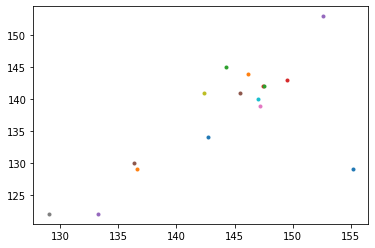

In [264]:
import matplotlib.pyplot as plt

plt.plot(modpredictY, ytest, '.')
plt.show()

### The result shown above is much better than the previous one, because if we were to build a regression line, 
# with all the 4 independent variable to the heartrate, the line has lower MSE than the previous one.

### The result shown above is much better than the previous one, because if we were to build a regression line, with all the 4 independent variable to the heartrate, the line has lower MSE than the previous one.

## Question 3 (20 points)

Actually, the data in Questions 1 and 2 are not quite independent of each other, as they form a sequence. Performance in a sport improves with training over time.

Perhaps we can model the effect of training on performance by adding a new variable to the data set that is the number of days since the training began.

Create a new variable indicating the number of days that have passed since training began. Let's name this variable $x_5$, and let $x_4$ be the "hours of rest since the last run" variable (last column in the $\texttt{X}$ data set). Let $x_5^{(0)} = 0$, and let

$$x_5^{(i)} = \frac{1}{24}\sum_{j=1}^{i-1} x_4^{(i)}.$$ 

You can calculate this more easily using the recurrence

$$x_5^{(i)} = x_5^{(i-1)} + \frac{1}{24}x_4^{(i)}.$$ 

**Do the following:**

1. **Add the new variable $x_5$ to your test and training datasets. Note that the test data are just a continuation of the series from the training data, so $x_5$ for the first entry in the test set should be $x_5$ for the last entry in the training set plus the number of rest hours for the first entry in the test set divided by 24.**

2. **Build a new regression model using the augmented data set, give the optimal parameters $\mathbf{\theta}$ here, and show the scatter plot of predicted versus actual outcomes for the training set and test set.**

In [188]:
# Place code to augment the data set and plot the results here
totalX  = np.r_[Xtrain, Xtest]
# totalY = np.r_[ytrain, ytest]
# totalX[:,3]
c = 0
x5 = []
x5.append(c)
for i in range(1,len(totalX)):
#     previousX5 = c
    c = c+ (totalX[i,3])/24
#     c = 
    x5.append(c) 
    
x5 = np.array([x5]).T
totalX = np.c_[totalX, x5]
totalX.shape

(56, 5)

In [189]:
# trainX = totalX[40,:]
# trainX.shape
# ytrain.shape

(40, 1)

In [190]:
# # totalX

# Xtnew = np.c_[np.ones(len(trainX)), trainX]


In [192]:
# analyticalTheta = analytical_solution(Xtnew, ytrain.T)
# print(analyticalTheta)
# analyticalTheta = analyticalTheta.T
# analyticalTheta.shape

()

## Question 4 (20 points)

Next we consider a classification problem. We know that logistic regression is only capable of modeling linear classification boundaries. In this question, you will synthesize a data set that has a nonlinear classification boundary then show that we can obtain a good logistic regression classifier by transforming the data so that an appropriate classification boundary is linear in the new transformed inputs.

**Do the following:**

1. **Generate 100 data points for class 1 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 2$ and standard deviation 1.0.**

2. **Generate 100 data points for class 2 in which $x_1$ is sampled uniformly from the range [-3..3] and $x_2$ is sampled from a Gaussian with mean $x_1^2 + 5$ and standard deviation 1.0.**

3. **Split the dataset into 80% test and 20% train, estimate a logistic regression model, and report the model's training set accuracy, test set accuracy, and optimal parameters here:**

4. **Transform the data to contain five input variables: $x_1$, $x_2$, $x_1^2$, $x_2^2$, and $x_1x_2$. Build a new logistic regression model, report its training and test set accuracy, and optimal parameters here:**


array([ 0.08581632, -0.00692761,  0.17203333])

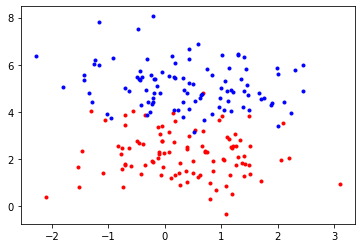

In [236]:
# Place code to generate the data, estimate the models, and report accuracy here

a = np.random.uniform(-3,3,100)
amean = a.mean()
# amean

mu_1 = np.array([amean, amean**2 + 2])
sigma_1 = 1
num_sample = 100
cov_mat1 = np.matrix([[sigma_1,0],[0,sigma_1]])
c1x1, c1x2 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat1, size = num_sample).T

plt.plot(c1x, c1y, 'r.')


mu_2 = np.array([amean, amean**2 + 5])
sigma_1 = 1
num_sample = 100
cov_mat1 = np.matrix([[sigma_1,0],[0,sigma_1]])
c2x1, c2x2 = np.random.multivariate_normal(mean= mu_2, cov=cov_mat1, size = num_sample).T


plt.plot(c2x, c2y, 'b.')

# plt.show()
# b = np.random.normal(2, )

X1 = np.r_[c1x1, c2x1]
X2 = np.r_[c2x1, c2x2]
Xlr = np.c_[np.ones(len(X1)), X1, X2]
ylr = np.r_[np.zeros(100), np.ones(100)]
# X1.shape

thetaA = analytical_solution(Xlr,ylr)
thetaA

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xlr, ylr, test_size=0.2, random_state=42)

M = 160
N = 2
alpha = 0.00001

theta = np.matrix([[0.08581632,-1,-1]]).T
XX = X_train
yy = np.array([y_train]).T
yy.shape

(160, 1)

In [266]:
acc_best = 0
theta_best = theta
for i in range(0,5000):
    y_pred = (1/(1+np.exp(-theta.T * XX.T))).T
    y_pred[y_pred<0.01] = 0.01
    y_pred[y_pred>0.99] = 0.99
    loglike = sum(np.multiply(yy,np.log(y_pred))+np.multiply(1-yy,np.log(1-y_pred)))
    pred = np.ones((M,1))
    pred[y_pred < 0.5] = 0
    corr = pred == yy
#     print(sum(corr))
    acc = sum(corr)/M
#     print('Iter %d: log likelihood %f accuracy %f' % (i, loglike, acc))
    if acc > acc_best:
        theta_best = theta
        acc_best = acc
    order = np.random.permutation(range(0,M))
    num_corr = 0
    for j in range(0,M):
        x = XX[order[j],:].T
        print(x.shape)
        y_actual = yy[order[j],0]
        y_pred = 1/(1+np.exp(-theta.T * x))
        y_pred = y_pred[0,0]
        gradient = (y_actual - y_pred) * x
        theta = theta + alpha * gradient
        if (y_pred >= 0.5 and y_actual == 1) or (y_pred < 0.5 and y_actual == 0):
            num_corr = num_corr + 1
print("Optimal theta: [%f %f %f]" % (theta_best[0], theta_best[1], theta_best[2]))    
print("Accuracy of optimal theta: %f" % acc_best)

# Place code to plot the data here

(3,)


ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

## Question 5 (20 points)

Suppose you were interested in predicting the number of traffic fatalities that occur at a given traffic intersection based on various factors that might indicate the level of danger at that intersection: number of lanes, speed limit, types and number of businesses close to the intersection, curvature of the roads leading to the intersection, number of people that live in the surrounding area, and so on.

Imagine that you obtain monthly fatality counts for 500 intersections in Bangkok and also obtain the necessary input data on the characteristics of the intersections then start to model.

The standard linear regression model would consider the outcome (the number of traffic fatalities per month) as a Gaussian random variable with a mean of $\mathbf{\theta}^T\mathbf{x}$. But that might not be the best approach for this problem.

For example, you might consider the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

**Do the following.**

1. **Read briefly about the Poisson distribution and explain here why it would be a better model of the outcome (number of traffic fatalities per month at a particular intersection) than a Gaussian.**

2. **Noting that the Poisson distribution is a member of the exponential family, explain in general how you could use the GLM approach to come up with a model that predicts the fatality rate to be a Poisson random variable with mean** $\lambda = \exp(\mathbf{\theta}^T\textbf{x})$. **(Note that the exponential here is just to convert the linear combination of inputs, which could be positive or negative, to a strictly positive value.)**

Note that for part 2, *you do not need to derive any equations*! Just explain what steps you would take to obtain a good machine learning algorithm for this problem.
